<a href="https://colab.research.google.com/github/SoLads/Sub_Mack/blob/main/Projeto_SUB_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto SUB de Análise Exploratória de Dados
---

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Estudo Paises America Latina</font></h1>
<hr>




In [25]:
#@title Identificação

#@markdown Turma
Turma = '6Q11' #@param {type:"string"}
#@markdown Integrantes do Grupo
Aluno1 = 'Lucas Ladeira de Freitas - 41921429' #@param {type:"string"}





# Problema 

O estudo tem o foco nos 5 Paises da America Latina com maior população: Brasil, México, Colombia, Argentina e Peru.
Durante o estudo serão apresentados 5 indicadores, sendo o principal o GDP/Pessoa também conhecido como PIB por Pessoa. Os outros 4 indicadores abordados são IDH, Expectativa de vida, anos de educação e população total.
Por fim a ideia é entender o comportamento do PIB em relação aos outros indicadores indicados.

# Descrição e origem dos dados 

Todas as bases e dados foram obtidos através do Gapminder. 

Após o download das bases escolhidas no Gapminder, fiz um Upload em um Github público (https://github.com/SoLads/Sub_Mack/) facilitando o acesso aos dados na nuvem.






# Aquisição dos Dados

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais  reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis). 





In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline

#Funções criadas para serem utilizadas nesse trabalho
#Conversor de Valor + String para Valor multiplicado pelo equivalente da string
def convert(valor):
    if valor:
        # determine o multiplicador
        multiplier = 1
        if valor.endswith('k'):
            multiplier = 1000
            valor = valor[0:len(valor)-1] 
        elif valor.endswith('M'):
            multiplier = 1000000
            valor = valor[0:len(valor)-1]
        elif valor.endswith('B'):
            multiplier = 1000000000
            valor = valor[0:len(valor)-1]

        # converte para inteiro
        return int(float(valor) * multiplier)

    else:
        return 0

#Import de 5 Data Frames, baixados do GapMinder e inseridos no GitHub.
df_hdi = pd.read_csv(r'https://raw.githubusercontent.com/SoLads/Sub_Mack/main/hdi_human_development_index.csv')
df_gdp_por_pessoa = pd.read_csv(r'https://raw.githubusercontent.com/SoLads/Sub_Mack/main/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_expec_vida = pd.read_csv(r'https://raw.githubusercontent.com/SoLads/Sub_Mack/main/life_expectancy_years.csv')
df_pop_total = pd.read_csv(r'https://raw.githubusercontent.com/SoLads/Sub_Mack/main/population_total.csv')
df_owid_edu = pd.read_csv(r'https://raw.githubusercontent.com/SoLads/Sub_Mack/main/owid_education_idx.csv')

# Exibindo os Dataframes


In [27]:
print('\n')
print('Indice IDH, leva em consideração a Expectativa de vida, educação e qualidade de vida.')
print('\n')
df_hdi.head()



Indice IDH, leva em consideração a Expectativa de vida, educação e qualidade de vida.




,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,0.348,0.350,0.353,0.384,0.393,0.409,0.418,0.429,0.447,0.447,0.460,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391,0.400,0.410,0.426,0.435,0.446,0.460,0.473,0.489,0.501,0.515,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
2,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,0.665,0.671,0.678,0.684,0.691,0.696,0.706,0.713,0.722,0.728,0.733,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813,0.815,0.820,0.827,0.833,0.827,0.837,0.837,0.840,0.839,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,United Arab Emirates,0.723,0.735,0.738,0.745,0.755,0.764,0.765,0.766,0.769,0.776,0.782,0.787,0.792,0.798,0.803,0.809,0.814,0.819,0.821,0.819,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890


In [28]:
print('\n')
print('PIB divido por pessoa.')
print('\n')
df_gdp_por_pessoa.head()



PIB divido por pessoa.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,674,674,674,674,674,674,674,674,674,674,675,675,675,675,675,675,675,675,675,675,675,679,681,683,685,688,690,692,694,697,699,701,704,707,709,711,713,716,719,...,1910,2080,2120,2100,2070,2060,2060,2030,2070,1920,1950,1990,2040,2070,2100,2140,2170,2210,2250,2300,2340,2390,2440,2490,2540,2590,2650,2710,2760,2820,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,718,721,724,728,731,735,738,740,743,747,750,754,754,755,756,756,757,757,758,758,759,759,761,761,762,762,762,763,763,764,...,7680,8040,8140,8240,8040,7570,7310,6930,6670,6220,6060,6020,6050,6090,6150,6190,6240,6300,6370,6460,6560,6680,6810,6950,7090,7240,7400,7550,7710,7880,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,747,747,747,747,747,747,748,748,748,748,748,748,750,751,754,755,757,758,760,761,764,765,767,769,770,773,774,776,777,779,...,11.1k,11.3k,11.4k,11.6k,11.9k,12.3k,12.8k,13.4k,13.7k,13.3k,13.9k,14.5k,15.1k,15.7k,16.3k,16.9k,17.5k,18.1k,18.6k,19.2k,19.7k,20.2k,20.6k,21.1k,21.6k,22k,22.5k,23k,23.5k,24k,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,1380,1380,1390,1390,1400,1420,1440,1460,1470,1490,1510,1530,1540,1560,1580,1600,1620,1640,1660,1680,1700,1720,...,46.9k,46.9k,48.9k,50.2k,52.1k,53.9k,55.6k,57.6k,59.6k,61.6k,63.7k,65.9k,68.2k,70.5k,72.9k,75.4k,77.9k,80.4k,82.9k,85.2k,87.4k,89.5k,91.6k,93.6k,95.6k,97.7k,99.7k,102k,104k,106k,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,1150,1160,1160,1170,1170,1180,1180,1180,1190,1190,1200,1200,1210,1210,1220,1220,1220,1230,1230,1240,1240,1250,1250,1260,1260,1270,1270,1280,1280,1290,...,56.1k,57.4k,59.9k,62.4k,65.2k,66.5k,67.2k,67k,67.1k,61.3k,61.3k,61k,60.7k,60.4k,60.2k,59.9k,59.7k,59.7k,59.9k,60.4k,61.1k,62.1k,63.2k,64.4k,65.7k,67.1k,68.5k,69.9k,71.4k,72.9k,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


In [29]:
print('\n')
print('Expectativa de Vida em anos.')
print('\n')
df_expec_vida.head()



Expectativa de Vida em anos.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.8,27.8,27.8,...,71.5,71.7,71.8,72.0,72.1,72.2,72.3,72.5,72.6,72.7,72.9,73.0,73.1,73.3,73.4,73.5,73.7,73.8,74.0,74.1,74.2,74.3,74.5,74.6,74.8,74.9,75.0,75.2,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,74.8,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8,76.9,77.0,77.2,77.3,77.4,77.5,77.7,77.8,77.9,78.0,78.2,78.3,78.4,78.6,78.7,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,84.3,84.4,84.5,84.6,84.7,84.8,84.9,85.0,85.2,85.3,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,79.3,79.4,79.5,79.7,79.8,79.9,80.0,80.1,80.2,80.3,80.4,80.5,80.7,80.8,80.9,81.0,81.0,81.2,81.3,81.3,81.4,81.5,81.6,81.7,81.8,81.9,82.0,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [30]:
print('\n')
print('População Total.')
print('\n')
df_pop_total.head()



População Total.




,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.29M,3.3M,3.31M,3.32M,3.34M,3.35M,3.37M,3.38M,3.4M,3.41M,3.43M,3.45M,3.46M,3.48M,3.49M,3.51M,3.52M,3.54M,3.55M,...,71.4M,71.8M,72.3M,72.8M,73.2M,73.6M,74M,74.3M,74.7M,75M,75.3M,75.5M,75.8M,76M,76.2M,76.4M,76.5M,76.7M,76.8M,76.9M,76.9M,77M,77M,77M,77M,77M,76.9M,76.9M,76.8M,76.7M,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.58M,1.59M,1.61M,1.64M,1.66M,1.69M,1.71M,1.74M,1.76M,1.79M,1.81M,1.84M,1.87M,1.9M,1.92M,1.95M,1.98M,2.01M,2.04M,...,99.5M,102M,104M,106M,108M,110M,112M,115M,117M,119M,121M,124M,126M,128M,131M,133M,135M,137M,140M,142M,144M,147M,149M,151M,154M,156M,158M,161M,163M,165M,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,418k,420k,422k,424k,426k,427k,429k,431k,433k,435k,437k,439k,441k,443k,445k,447k,449k,451k,453k,455k,457k,459k,461k,463k,465k,467k,470k,472k,474k,...,2.17M,2.14M,2.12M,2.09M,2.07M,2.04M,2.02M,1.99M,1.97M,1.94M,1.92M,1.89M,1.86M,1.83M,1.81M,1.78M,1.75M,1.72M,1.69M,1.66M,1.63M,1.6M,1.57M,1.54M,1.51M,1.48M,1.45M,1.42M,1.39M,1.36M,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,2660,2670,2680,2690,2710,2730,2750,2770,2790,2810,2830,2850,2870,2890,2910,2930,2950,2970,2990,3010,...,71.3k,70.8k,70.2k,69.7k,69.2k,68.7k,68.3k,67.8k,67.4k,66.9k,66.5k,66.2k,65.8k,65.5k,65.2k,64.9k,64.6k,64.4k,64.2k,64k,63.9k,63.7k,63.6k,63.5k,63.4k,63.3k,63.3k,63.2k,63.1k,63.1k,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,10.7M,10.7M,10.7M,10.8M,10.8M,10.9M,10.9M,11M,11M,11.1M,11.1M,11.1M,11.2M,11.3M,11.3M,11.4M,11.4M,11.5M,11.5M,11.6M,11.7M,11.7M,11.8M,11.9M,11.9M,12M,12.1M,12.1M,12.2M,12.3M,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [31]:
print('\n')
print('Indicador de anos de estudo (%) que pode ir de 0 a 15 anos.')
print('\n')
df_owid_edu.head()



Indicador de anos de estudo (%) que pode ir de 0 a 15 anos.




,country,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,...,NaN,NaN,5.2,NaN,NaN,NaN,NaN,7.73,NaN,NaN,NaN,NaN,9.93,10.7,10.7,11.3,12.0,12.7,12.7,13.3,13.3,14.0,14.7,14.7,15.3,16.0,16.7,17.3,18.0,19.3,20.0,20.7,21.3,22.0,22.7,23.3,23.3,24.0,24.0,25.3
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.3,29.3,29.3,29.3,29.3,29.3,29.3,30.0,30.0,30.7,31.3,31.3,31.3,32.0,32.7,32.7,33.3,34.0,34.0
2,Albania,0.1330,NaN,NaN,NaN,NaN,0.1330,NaN,NaN,NaN,NaN,0.1330,NaN,NaN,NaN,NaN,0.2000,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.2670,NaN,NaN,NaN,NaN,0.4000,NaN,NaN,NaN,NaN,0.4670,NaN,NaN,NaN,...,NaN,NaN,33.0,NaN,NaN,NaN,NaN,45.00,NaN,NaN,NaN,NaN,52.20,52.0,52.0,52.0,52.0,53.3,54.7,55.3,56.7,57.3,58.7,58.0,60.0,60.0,60.7,60.7,61.3,61.3,61.3,62.0,62.0,62.0,64.0,64.7,64.7,64.7,66.7,66.7
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.7,47.3,50.7,67.3,70.0,65.3,67.3,67.3,67.3,67.3,67.3,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.9,NaN,NaN,NaN,NaN,29.80,NaN,NaN,NaN,NaN,37.50,39.3,41.3,43.3,45.3,47.3,48.7,50.7,52.0,53.3,55.3,56.0,57.3,58.0,59.3,60.7,62.0,62.7,64.0,64.7,66.0,66.7,68.0,68.7,70.0,70.7,72.0,72.0


# Ajustando os dados para criar um DF único para os Top 5 Paises da América Latina.


In [32]:
lista_paises = ['Brazil', 'Mexico', 'Colombia', 'Argentina','Peru']

#Filtrando todos os DFs com a lista de paises da AM

hdi_al = df_hdi[df_hdi['country'].isin(lista_paises)]
gdp_por_pessoa_al =df_gdp_por_pessoa[df_gdp_por_pessoa['country'].isin(lista_paises)]
expec_vida_al = df_expec_vida[df_expec_vida['country'].isin(lista_paises)]
pop_total_al = df_pop_total[df_pop_total['country'].isin(lista_paises)]
owid_edu_al = df_owid_edu[df_owid_edu['country'].isin(lista_paises)]

lista_al = [hdi_al,gdp_por_pessoa_al,expec_vida_al,pop_total_al,owid_edu_al]

for i in lista_al:
  i.reset_index(drop=True, inplace=True)

#Ajustando valores de GDP para isso resetaremos os indices e utilizaremos uma matriz transporta do gdp inicial chamada de converter.
#Além disso, utilizaremos os dados de anos em uma lista apartada chamada de datas

gdp_por_pessoa_al.reset_index(drop=True, inplace=True)
datas = gdp_por_pessoa_al.T.index.tolist()
converter = gdp_por_pessoa_al.T.reset_index(drop=True)

#Ajustando os valores K em GDP
#utilizaremos o loop para cada pais do Top 5 America Latina e chamaremos a função "converter" que foi criada no inicio do projeto.
#Essa função irá multiplicar os valores que possuem k no final para Valor * 1000 e converterá para int - já que agora eles são str.

ignorar = ['Brazil','Mexico','Colombia','Argentina','Peru']
brazil = []
for i in converter[0]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      brazil.append(x)
    else:
      brazil.append(i)  

Mexico = []      

for i in converter[1]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Mexico.append(x)
    else:
      Mexico.append(i)  

Colombia = []      

for i in converter[2]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Colombia.append(x)
    else:
      Colombia.append(i)  

Argentina = []
for i in converter[3]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Argentina.append(x)
    else:
      Argentina.append(i)  

Peru = []
for i in converter[4]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Peru.append(x)
    else:
      Peru.append(i)  

gdp_por_pessoa_al = pd.DataFrame({'list1':datas, 'list2':brazil, 'list3':Mexico, 'list4':Colombia, 'lista5':Argentina,'lista6':Peru })

if gdp_por_pessoa_al.columns[1] != 'Brazil':
  gdp_por_pessoa_al = gdp_por_pessoa_al.T
  gdp_por_pessoa_al.columns = gdp_por_pessoa_al.iloc[0]
  gdp_por_pessoa_al = gdp_por_pessoa_al[1:]
  gdp_por_pessoa_al.reset_index(drop=True, inplace=True)
  gdp_por_pessoa_al = gdp_por_pessoa_al.rename_axis(None, axis=1)
  gdp_por_pessoa_al

pop_total_al

pop_total_al.reset_index(drop=True, inplace=True)
datas = pop_total_al.T.index.tolist()
converter = pop_total_al.T.reset_index(drop=True)

#Ajustando os valores K, M e B em pop_total_al
#Essa função irá multiplicar os valores que possuem k no final para Valor * 1000 
#Essa função irá multiplicar os valores que possuem M no final para Valor * 1000000 
#Essa função irá multiplicar os valores que possuem B no final para Valor * 1000000000

ignorar = ['Brazil','Mexico','Colombia','Argentina','Peru']

brazil = []
for i in converter[0]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      brazil.append(x)
    else:
      brazil.append(i)  

Mexico = []      

for i in converter[1]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Mexico.append(x)
    else:
      Mexico.append(i)  

Colombia = []      

for i in converter[2]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Colombia.append(x)
    else:
      Colombia.append(i)  

Argentina = []
for i in converter[3]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Argentina.append(x)
    else:
      Argentina.append(i)

Peru = []
for i in converter[4]:
    if i not in ignorar and type(i) == str:
      x = convert(i)
      Peru.append(x)
    else:
      Peru.append(i)    


pop_total_al = pd.DataFrame({'list1':datas, 'list2':brazil, 'list3':Mexico, 'list4':Colombia, 'lista5':Argentina, 'lista6':Peru})

if pop_total_al.columns[1] != 'Brazil':
  pop_total_al = pop_total_al.T
  pop_total_al.columns = pop_total_al.iloc[0]
  pop_total_al = pop_total_al[1:]
  pop_total_al.reset_index(drop=True, inplace=True)
  pop_total_al = pop_total_al.rename_axis(None, axis=1)
  pop_total_al

lista_al = [hdi_al,gdp_por_pessoa_al,expec_vida_al,pop_total_al,owid_edu_al]

for i in lista_al:
  i.reset_index(drop=True, inplace=True)


In [33]:
#Para criarmos 1 dataframe unico, precisamos entender quais são os anos que devemos considerar para que não haja um descasamento de informações a serem comparadas

maior_data_inicial = []
menor_data_final = []
for i in lista_al:
  primeira_data = int(i.columns[1])
  maior_data_inicial.append(primeira_data)
  ultima_data = int(i.columns[-1])
  menor_data_final.append(ultima_data)


print(f'Primeiro ano a ser auferido: %s'%max(maior_data_inicial)) 
print(f'Ultimo ano  a ser auferido: %s'%min(menor_data_final))
print('Com isso descobrimos que as colunas do nosso dataset precisa começar em %s e terminar em %s para amparar todas os dataframes!' %(max(maior_data_inicial),min(menor_data_final)))

Primeiro ano a ser auferido: 1989
Ultimo ano  a ser auferido: 2016
Com isso descobrimos que as colunas do nosso dataset precisa começar em 1989 e terminar em 2016 para amparar todas os dataframes!


In [34]:
lista_datas_colunas = ['country']

range_datas_colunas = range(int(max(maior_data_inicial)),int(min(menor_data_final)+1))
for ano in range_datas_colunas:
  ano = str(ano)
  lista_datas_colunas.append(ano)



lista_ajustada_data_al = []
for i in lista_al:
  i.reset_index(drop=True, inplace=True)
  i = i[lista_datas_colunas]
  lista_ajustada_data_al.append(i)


lista_ajustada_data_al


# Mudaremos o nome da coluna Country de cada data_frame pelo nome do indicador que estamos verificando

nomes = ['hdi','gdp_por_pessoa', 'expec_vida','pop_total', 'owid_edu']
x = 0
for i in lista_ajustada_data_al:
  i.rename(columns={'country': nomes[x]}, inplace=True)
  x += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


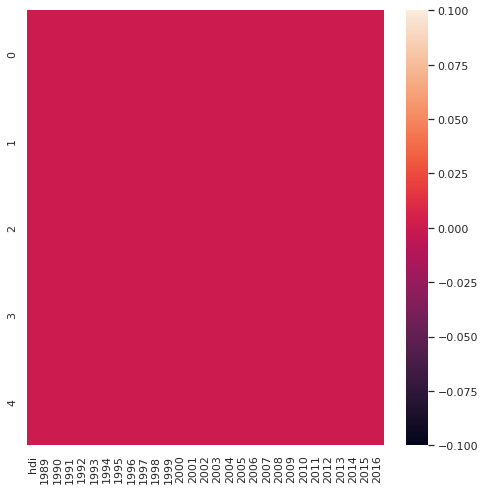

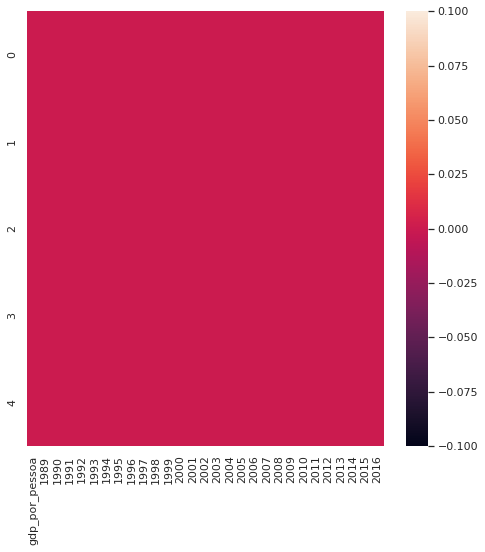

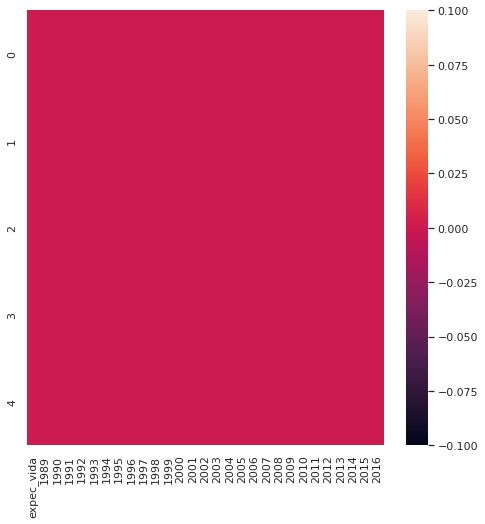

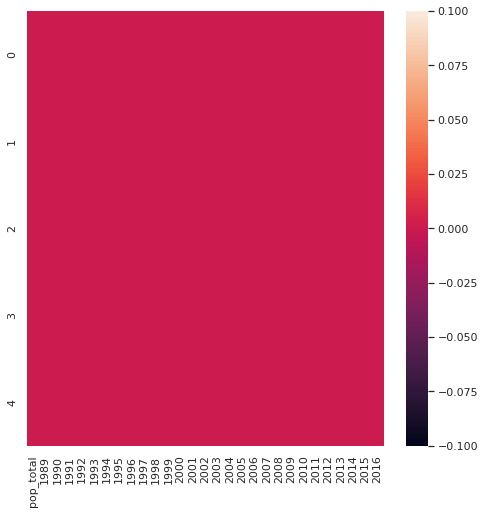

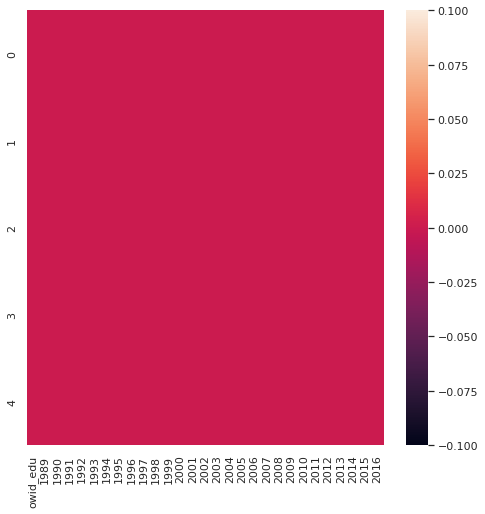

In [35]:
#Vamos verificar se existe valores nulos dentro dos nossos dataframes da lista_al
for i in lista_ajustada_data_al:
  plt.figure(figsize=(8,8))
  sns.heatmap(i.isnull())

In [36]:
#Vamos utilizar o loop para ajusta os dfs e aproveitar para renomear as colunas e ajustar a coluna year que esta como str, vamos deixa-la como int!


for i in lista_ajustada_data_al:
  x = 0  
  df1 = pd.melt(lista_ajustada_data_al[x], id_vars = 'hdi')
  df1.columns = ['country', 'year', 'hdi']
  df1['year'] = pd.to_numeric(df1['year'])
  x += 1
  df2 = pd.melt(lista_ajustada_data_al[x], id_vars = 'gdp_por_pessoa')
  df2.columns = ['country', 'year', 'gdp_por_pessoa']
  df2['year'] = pd.to_numeric(df2['year'])
  x += 1
  df3 = pd.melt(lista_ajustada_data_al[x], id_vars = 'expec_vida')
  df3.columns = ['country', 'year', 'expec_vida']
  df3['year'] = pd.to_numeric(df3['year'])
  x += 1
  df4 = pd.melt(lista_ajustada_data_al[x], id_vars = 'pop_total')
  df4.columns = ['country', 'year', 'pop_total']
  df4['year'] = pd.to_numeric(df4['year'])
  x += 1
  df5 = pd.melt(lista_ajustada_data_al[x], id_vars = 'owid_edu')
  df5.columns = ['country', 'year', 'owid_edu']
  df5['year'] = pd.to_numeric(df5['year'])



In [37]:
#Vamos dar merge em nossos DFS para criar um unico!

new_df1 = pd.merge(df1, df5, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df2 = pd.merge(df2, df4, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df3 = pd.merge(df3, df2, how='inner', left_on=['year','country'], right_on=['year','country'])
new_df4 = pd.merge(df4, df1, how='inner', left_on=['year','country'], right_on=['year','country'])

#Vamos criar mais 2 merges auxiliares!

merge_1 = pd.merge(new_df1, new_df2, how='inner', left_on=['year','country'], right_on=['year','country'])
merge_2 = pd.merge(new_df3, new_df4, how='inner', left_on=['year','country'], right_on=['year','country'])

#Df_final
df_gapminder_al = pd.merge(merge_1, merge_2, how='inner', left_on=['year','country'], right_on=['year','country'])
df_gapminder_al

,country,year,hdi_x,owid_edu,gdp_por_pessoa_x,pop_total_x,expec_vida,gdp_por_pessoa_y,pop_total_y,hdi_y
0,Argentina,1989,0.718,52.5,14100,32600000,72.5,14100,32600000,0.718
1,Brazil,1989,0.613,26.9,10500,149000000,67.3,10500,149000000,0.613
2,Colombia,1989,0.603,36.4,8340,33100000,71.5,8340,33100000,0.603
3,Mexico,1989,0.656,37.1,15000,83900000,70.8,15000,83900000,0.656
4,Peru,1989,0.613,43.5,5250,22100000,69.2,5250,22100000,0.613
...,...,...,...,...,...,...,...,...,...,...
135,Argentina,2016,0.843,66.0,23600,43900000,76.3,23600,43900000,0.843
136,Brazil,2016,0.761,52.0,14500,208000000,75.4,14500,208000000,0.761
137,Colombia,2016,0.763,55.3,14200,48900000,80.0,14200,48900000,0.763
138,Mexico,2016,0.771,57.3,19800,125000000,75.5,19800,125000000,0.771


# Análise dos Dados


## Estrutura dos Dados

Descreva resumidamente a estrutura dos dados.

In [38]:
df_gapminder_al



,country,year,hdi_x,owid_edu,gdp_por_pessoa_x,pop_total_x,expec_vida,gdp_por_pessoa_y,pop_total_y,hdi_y
0,Argentina,1989,0.718,52.5,14100,32600000,72.5,14100,32600000,0.718
1,Brazil,1989,0.613,26.9,10500,149000000,67.3,10500,149000000,0.613
2,Colombia,1989,0.603,36.4,8340,33100000,71.5,8340,33100000,0.603
3,Mexico,1989,0.656,37.1,15000,83900000,70.8,15000,83900000,0.656
4,Peru,1989,0.613,43.5,5250,22100000,69.2,5250,22100000,0.613
...,...,...,...,...,...,...,...,...,...,...
135,Argentina,2016,0.843,66.0,23600,43900000,76.3,23600,43900000,0.843
136,Brazil,2016,0.761,52.0,14500,208000000,75.4,14500,208000000,0.761
137,Colombia,2016,0.763,55.3,14200,48900000,80.0,14200,48900000,0.763
138,Mexico,2016,0.771,57.3,19800,125000000,75.5,19800,125000000,0.771


## Análise (pergunta) 1.

*# Questão 1:Qual pais possui o maior cresicmento de GDP?**

In [39]:
#@markdown ---
#@title Q1. Aponte os principais recursos empregados nesta pergunta aqui:

Q1a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q1b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q1c = "Selecao de dados multicondicional" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q1d = "Quantidades e Proporcoes (bar, pizza)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q1e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q1f = "" #@param {type:"string"}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

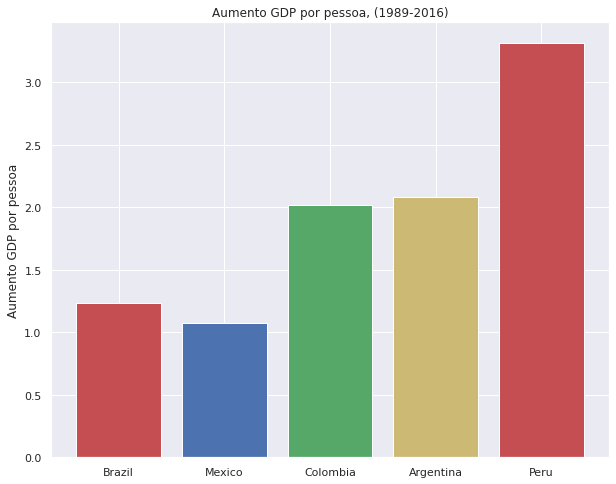

In [40]:
#Para facilitar algumas relações historicas dentro de um mesmo país vamos criar 4 novos dfs.
df_gapminder_br = df_gapminder_al.query('country == "Brazil"')
df_gapminder_mx = df_gapminder_al.query('country == "Mexico"')
df_gapminder_co = df_gapminder_al.query('country == "Colombia"')
df_gapminder_ar = df_gapminder_al.query('country == "Argentina"')
df_gapminder_pe = df_gapminder_al.query('country == "Peru"')


lista_gapminder_al = [df_gapminder_br, df_gapminder_mx, df_gapminder_co, df_gapminder_ar, df_gapminder_pe]


brazil_pc_crescimento = df_gapminder_br['gdp_por_pessoa_x'] = df_gapminder_br.groupby('country')['gdp_por_pessoa_x'].pct_change() * 100
mexico_pc_crescimento = df_gapminder_mx['gdp_por_pessoa_x'] = df_gapminder_mx.groupby('country')['gdp_por_pessoa_x'].pct_change() * 100
colombia_pc_crescimento = df_gapminder_co['gdp_por_pessoa_x'] = df_gapminder_co.groupby('country')['gdp_por_pessoa_x'].pct_change() * 100
argentina_pc_crescimento = df_gapminder_ar['gdp_por_pessoa_x'] = df_gapminder_ar.groupby('country')['gdp_por_pessoa_x'].pct_change() * 100
peru_pc_crescimento = df_gapminder_pe['gdp_por_pessoa_x'] = df_gapminder_pe.groupby('country')['gdp_por_pessoa_x'].pct_change() * 100

taxa_crescimento = brazil_pc_crescimento.mean(), mexico_pc_crescimento.mean(), colombia_pc_crescimento.mean(), argentina_pc_crescimento.mean(), peru_pc_crescimento.mean()
paises = ['Brazil', 'Mexico', 'Colombia','Argentina','Peru'] 

plt.rcParams['figure.figsize'] = 10,8 
plt.bar(x= paises, height= taxa_crescimento, color=['r','b','g','y','r'])
plt.ylabel('Aumento GDP por pessoa')
plt.title('Aumento GDP por pessoa, (1989-2016)')
plt.show()

In [41]:
comentario = "O Peru teve o maior valor acumulado par ao período, sendo que sua taxa de crescimento em GDP foi de 3.31% a.a"

print("O Aumento do GDP da Brasil anualmente para o período de 1989-2016 foi de : {}".format(brazil_pc_crescimento.mean()))
print("O Aumento do GDP da Mexico anualmente para o período de 1989-2016 foi de : {}".format(mexico_pc_crescimento.mean()))
print("O Aumento do GDP do Colombia anualmente para o período de 1989-2016 foi de : {}".format(colombia_pc_crescimento.mean()))
print("O Aumento do GDP da Argentina anualmente para o período de 1989-2016 foi de : {}".format(argentina_pc_crescimento.mean()))
print("O Aumento do GDP da Peru anualmente para o período de 1989-2016 foi de : {}".format(peru_pc_crescimento.mean()))
print("*"*50)
print(comentario)

O Aumento do GDP da Brasil anualmente para o período de 1989-2016 foi de : 1.2341010235076306
O Aumento do GDP da Mexico anualmente para o período de 1989-2016 foi de : 1.0756190431029355
O Aumento do GDP do Colombia anualmente para o período de 1989-2016 foi de : 2.01878181432107
O Aumento do GDP da Argentina anualmente para o período de 1989-2016 foi de : 2.0795455973534533
O Aumento do GDP da Peru anualmente para o período de 1989-2016 foi de : 3.313890861239376
**************************************************
O Peru teve o maior valor acumulado par ao período, sendo que sua taxa de crescimento em GDP foi de 3.31% a.a


## Análise (pergunta) 2.

**Analisando o Pais com maior crescimento de GDP**



In [42]:
#@markdown ---
#@title Q2. Aponte os principais recursos empregados nesta pergunta aqui:

Q2a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q2b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q2c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q2d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q2e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q2f = "" #@param {type:"string"}


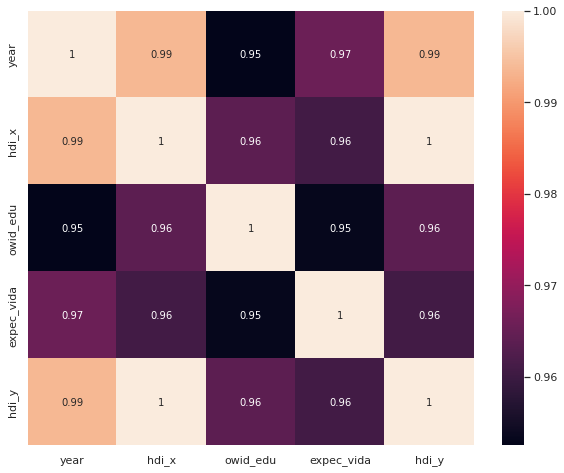

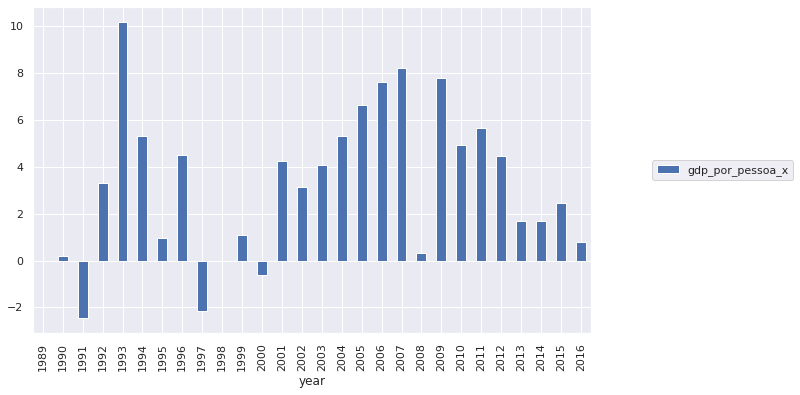

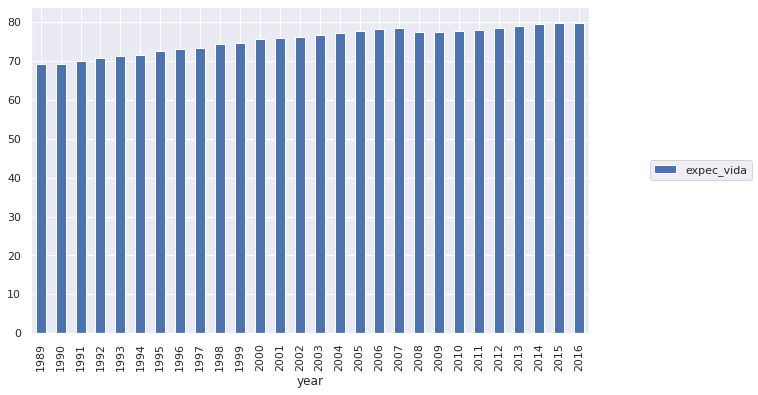

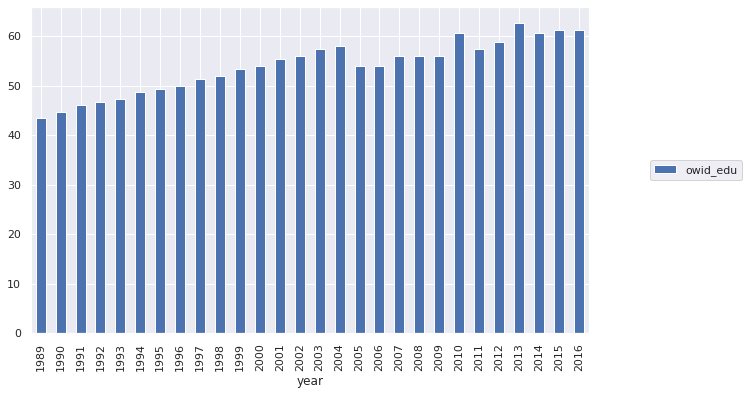



***************************************************************************************************************************************************************************************************

 Analisando os gráficos com os indicadores é notável uma correlação positiva entre os indicadores trabalhados. Ao observar os gráficos do indicador de GDP(PIB) por pessoa é possivel um crescimento exponencial a partir do ano de 2001, em relação a expectativa de vida
 o número cresce até 2007, cai em 2008 e volta a crescer no ano seguinte. Quanto aos indicares de educação existiu uma tendencia positiva até o ano de 2004 e nos anos seguintes uma variação ano pós ano.



***************************************************************************************************************************************************************************************************


In [43]:
peru_corr = df_gapminder_pe.corr()

sns.heatmap(peru_corr, 
            xticklabels=peru_corr.columns.values,
            yticklabels=peru_corr.columns.values, annot=True)



gdp_pe = pd.DataFrame(df_gapminder_pe[['country','year','gdp_por_pessoa_x']])
exp_pe =  pd.DataFrame(df_gapminder_pe[['country','year','expec_vida']])
owid_pe =  pd.DataFrame(df_gapminder_pe[['country','year','owid_edu']])

teste = gdp_pe.set_index(gdp_pe.columns[0])
a = teste.plot(x='year', y = 'gdp_por_pessoa_x', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = exp_pe.set_index(exp_pe.columns[0])
a = teste.plot(x='year', y = 'expec_vida', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = owid_pe.set_index(owid_pe.columns[0])
a = teste.plot(x='year', y = 'owid_edu', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()



#0.7 a 0.9 positivo ou negativo indica uma correlação forte. 
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada. 
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
print("\n")
print("*"*195)
print("""
 Analisando os gráficos com os indicadores é notável uma correlação positiva entre os indicadores trabalhados. Ao observar os gráficos do indicador de GDP(PIB) por pessoa é possivel um crescimento exponencial a partir do ano de 2001, em relação a expectativa de vida
 o número cresce até 2007, cai em 2008 e volta a crescer no ano seguinte. Quanto aos indicares de educação existiu uma tendencia positiva até o ano de 2004 e nos anos seguintes uma variação ano pós ano.
""")

print("\n")
print("*"*195)

## Análise (pergunta) 3.

**Em relação aos indicadores de educação, qual pais se destaca?**


In [44]:
#@markdown ---
#@title Q3. Aponte os principais recursos empregados nesta pergunta aqui:

Q3a = "Medias e Desvio Padrao" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q3b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q3c = "Selecao de dados multicondicional" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q3d = "Quantidades e Proporcoes (bar, pizza)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q3e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q3f = "" #@param {type:"string"}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

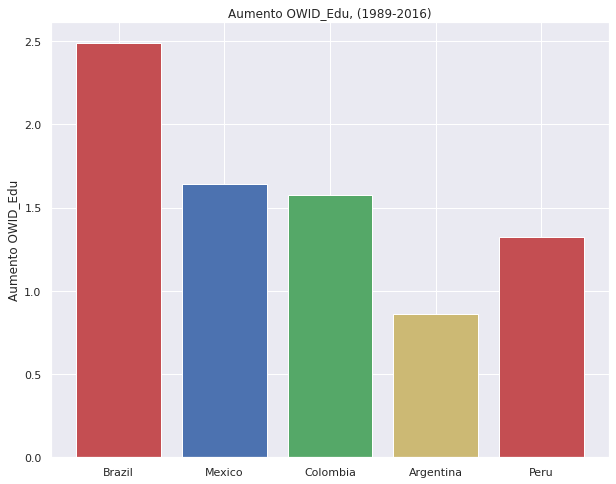

In [45]:
#Para facilitar algumas relações historicas dentro de um mesmo país vamos criar 4 novos dfs.
df_gapminder_br = df_gapminder_al.query('country == "Brazil"')
df_gapminder_mx = df_gapminder_al.query('country == "Mexico"')
df_gapminder_co = df_gapminder_al.query('country == "Colombia"')
df_gapminder_ar = df_gapminder_al.query('country == "Argentina"')
df_gapminder_pe = df_gapminder_al.query('country == "Peru"')


lista_gapminder_al = [df_gapminder_br, df_gapminder_mx, df_gapminder_co, df_gapminder_ar, df_gapminder_pe]


brazil_pc_crescimento = df_gapminder_br['owid_edu'] = df_gapminder_br.groupby('country')['owid_edu'].pct_change() * 100
mexico_pc_crescimento = df_gapminder_mx['owid_edu'] = df_gapminder_mx.groupby('country')['owid_edu'].pct_change() * 100
colombia_pc_crescimento = df_gapminder_co['owid_edu'] = df_gapminder_co.groupby('country')['owid_edu'].pct_change() * 100
argentina_pc_crescimento = df_gapminder_ar['owid_edu'] = df_gapminder_ar.groupby('country')['owid_edu'].pct_change() * 100
peru_pc_crescimento = df_gapminder_pe['owid_edu'] = df_gapminder_pe.groupby('country')['owid_edu'].pct_change() * 100

taxa_crescimento = brazil_pc_crescimento.mean(), mexico_pc_crescimento.mean(), colombia_pc_crescimento.mean(), argentina_pc_crescimento.mean(), peru_pc_crescimento.mean()
paises = ['Brazil', 'Mexico', 'Colombia','Argentina','Peru'] 

plt.rcParams['figure.figsize'] = 10,8 
plt.bar(x= paises, height= taxa_crescimento, color=['r','b','g','y','r'])
plt.ylabel('Aumento OWID_Edu')
plt.title('Aumento OWID_Edu, (1989-2016)')
plt.show()

In [46]:
comentario = "O Brasil apresentou o maior crescimento em anos de estudo durante o período, com um total de 2,48% a.a"

print("O Aumento do OWID da Brasil anualmente para o período de 1989-2016 foi de : {}".format(brazil_pc_crescimento.mean()))
print("O Aumento do OWID da Mexico anualmente para o período de 1989-2016 foi de : {}".format(mexico_pc_crescimento.mean()))
print("O Aumento do OWID do Colombia anualmente para o período de 1989-2016 foi de : {}".format(colombia_pc_crescimento.mean()))
print("O Aumento do OWID da Argentina anualmente para o período de 1989-2016 foi de : {}".format(argentina_pc_crescimento.mean()))
print("O Aumento do OWID da Peru anualmente para o período de 1989-2016 foi de : {}".format(peru_pc_crescimento.mean()))

print("*"*50)
print(comentario)

O Aumento do OWID da Brasil anualmente para o período de 1989-2016 foi de : 2.488001162312216
O Aumento do OWID da Mexico anualmente para o período de 1989-2016 foi de : 1.64099473072497
O Aumento do OWID do Colombia anualmente para o período de 1989-2016 foi de : 1.5728041859459003
O Aumento do OWID da Argentina anualmente para o período de 1989-2016 foi de : 0.8628457123720369
O Aumento do OWID da Peru anualmente para o período de 1989-2016 foi de : 1.3234916931857872
**************************************************
O Brasil apresentou o maior crescimento em anos de estudo durante o período, com um total de 2,48% a.a


## Análise (pergunta) 4.

**Correlação dos indicadores - Brasil**


In [47]:
#@markdown ---
#@title Q4. Aponte os principais recursos empregados nesta pergunta aqui:

Q4a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q4b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q4c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q4d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q4e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q4f = "" #@param {type:"string"}

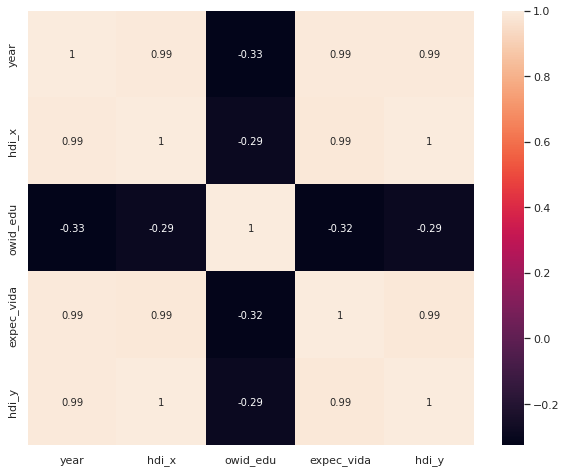

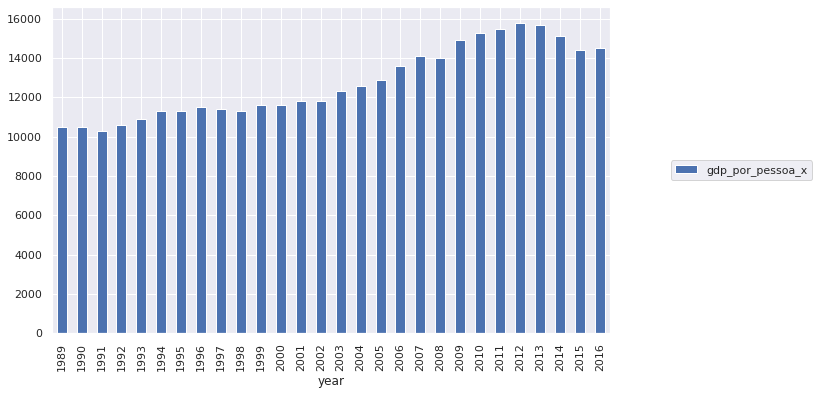

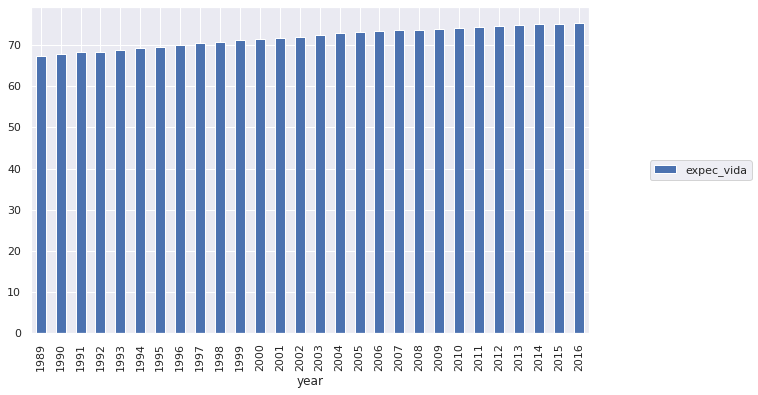

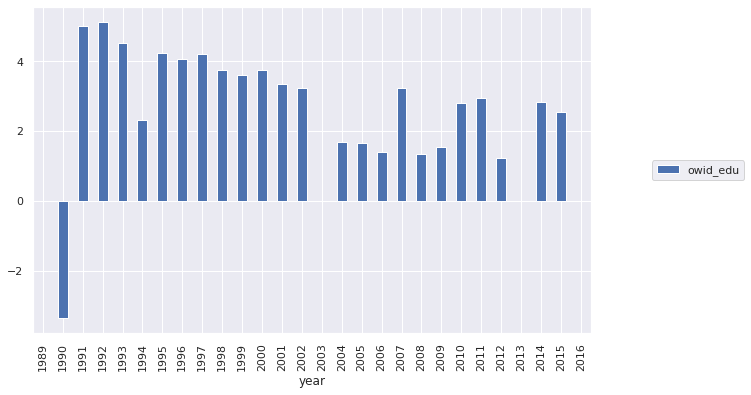



***************************************************************************************************************************************************************************************************

  Observando os dados do Brasil, podemos ver que a única correlação fraca é ligada ao indicador de educação OWID mesmo com o Brasil tendo o maior crescimento desse indicador em relação aos outros Top 5 Paises da America Latina.
  Em relação ao GDP podemos ver um alto crescimento entre os anos de 2002 até 2012, coincidentemente anos do governo Lula que impulsionou programas sociais e de renda. É interessante ver que ao contrário da Argentina que apresentou
  o maior crescimento de GDP do Top 5 o Brasil não possui variações com valores negativos e positivos de GDP. Em relação a expectativa de vida podemos ver um crescimento linear em todos os anos.



***********************************************************************************************************************************************

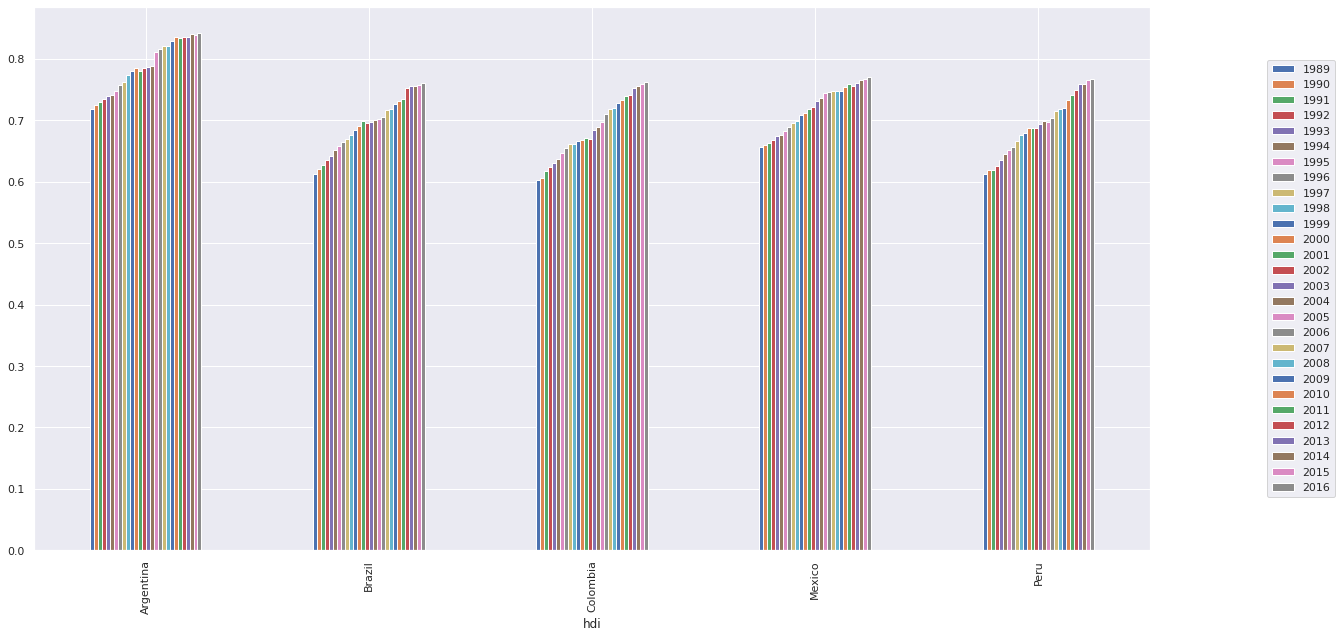

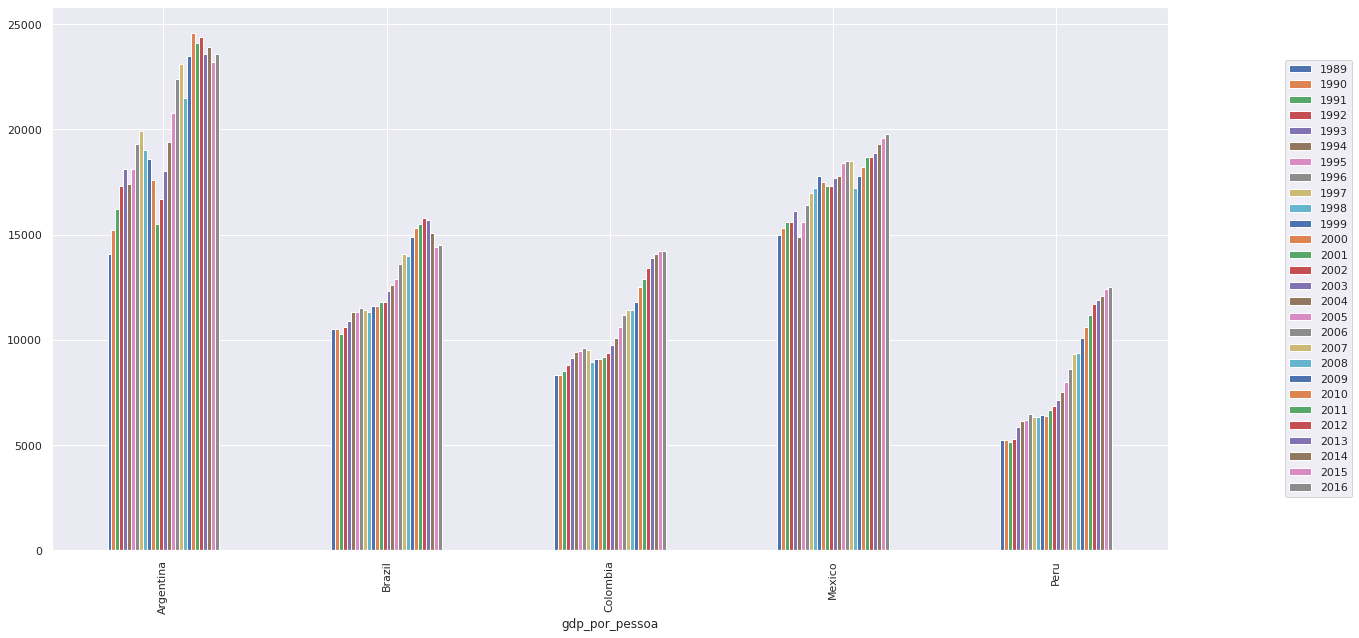

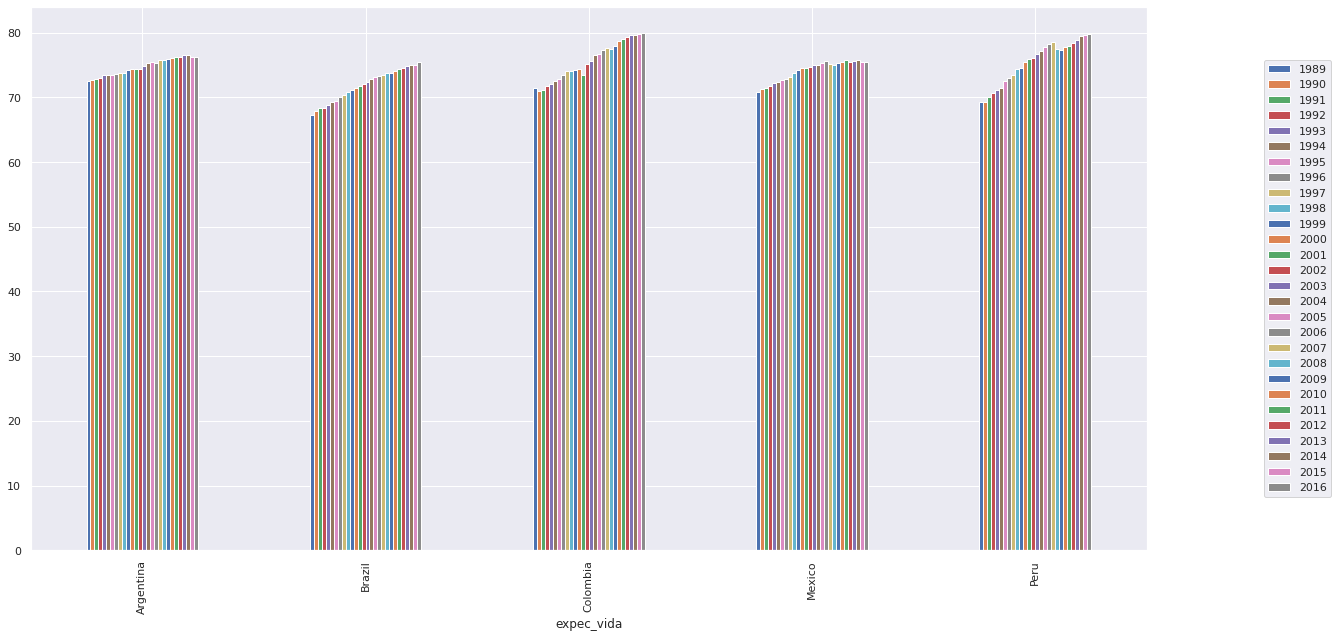

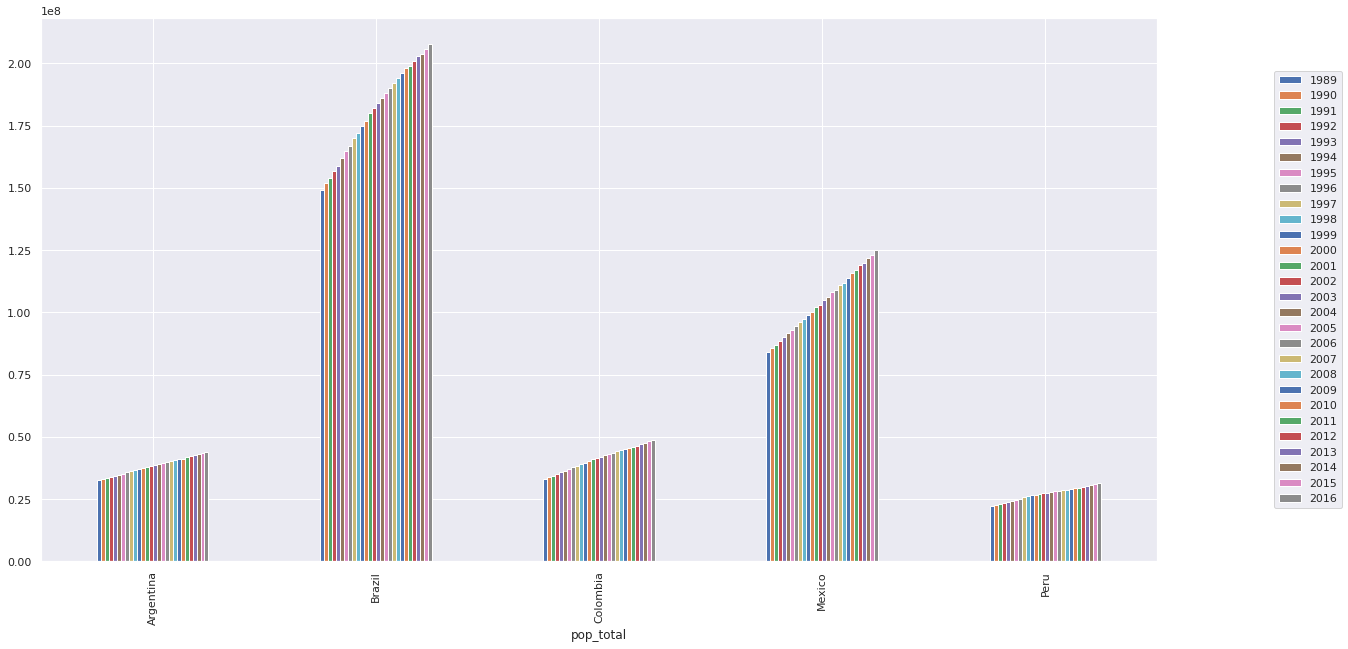

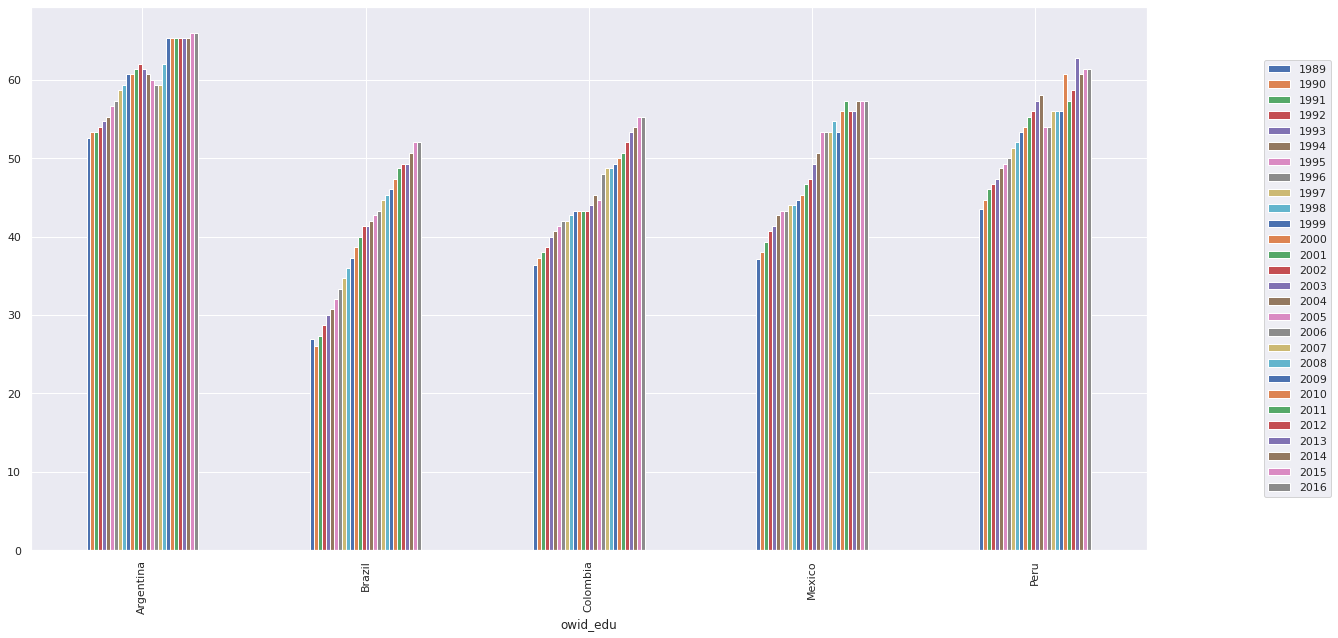

In [48]:
br_corr = df_gapminder_br.corr()

sns.heatmap(br_corr, 
            xticklabels=br_corr.columns.values,
            yticklabels=br_corr.columns.values, annot=True)


gdp_br = pd.DataFrame(df_gapminder_br[['country','year','gdp_por_pessoa_x']])
exp_br =  pd.DataFrame(df_gapminder_br[['country','year','expec_vida']])
owid_br =  pd.DataFrame(df_gapminder_br[['country','year','owid_edu']])

teste = gdp_br.set_index(gdp_br.columns[0])
a = teste.plot(x='year', y = 'gdp_por_pessoa_x', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = exp_br.set_index(exp_br.columns[0])
a = teste.plot(x='year', y = 'expec_vida', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

teste = owid_br.set_index(owid_br.columns[0])
a = teste.plot(x='year', y = 'owid_edu', kind='bar',figsize=(10,6))
a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()



#0.7 a 0.9 positivo ou negativo indica uma correlação forte. 
#0.5 a 0.7 positivo ou negativo indica uma correlação moderada. 
#0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

print("\n")
print("*"*195)
print("""
  Observando os dados do Brasil, podemos ver que a única correlação fraca é ligada ao indicador de educação OWID mesmo com o Brasil tendo o maior crescimento desse indicador em relação aos outros Top 5 Paises da America Latina.
  Em relação ao GDP podemos ver um alto crescimento entre os anos de 2002 até 2012, coincidentemente anos do governo Lula que impulsionou programas sociais e de renda. É interessante ver que ao contrário da Argentina que apresentou
  o maior crescimento de GDP do Top 5 o Brasil não possui variações com valores negativos e positivos de GDP. Em relação a expectativa de vida podemos ver um crescimento linear em todos os anos.
""")

print("\n")
print("*"*195)

x=0
for i in lista_ajustada_data_al:
  teste = lista_ajustada_data_al[x].set_index(lista_ajustada_data_al[x].columns[0])
  a = teste.plot(kind='bar',figsize=(20,10))
  a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
  plt.show()
  x += 1

## Análise (pergunta) 5.

**Existe alguma relação entre GDP e Expectativa de Vida?**


In [49]:
#@markdown ---
#@title Q5. Aponte os principais recursos empregados nesta pergunta aqui:

Q5a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q5b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q5c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q5d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q5e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q5f = "" #@param {type:"string"}

In [50]:
df_gapminder_br = df_gapminder_al.query('country == "Brazil"')
df_gapminder_mx = df_gapminder_al.query('country == "Mexico"')
df_gapminder_co = df_gapminder_al.query('country == "Colombia"')
df_gapminder_ar = df_gapminder_al.query('country == "Argentina"')
df_gapminder_pe = df_gapminder_al.query('country == "Peru"')

df_gapminder_br['gdp_por_pessoa'] = pd.to_numeric(df_gapminder_br['gdp_por_pessoa_x'], errors='coerce')
df_gapminder_br.reset_index(drop=True,inplace=True)

df_gapminder_mx['gdp_por_pessoa'] = pd.to_numeric(df_gapminder_mx['gdp_por_pessoa_x'], errors='coerce')
df_gapminder_mx.reset_index(drop=True,inplace=True)

df_gapminder_co['gdp_por_pessoa'] = pd.to_numeric(df_gapminder_co['gdp_por_pessoa_x'], errors='coerce')
df_gapminder_co.reset_index(drop=True,inplace=True)

df_gapminder_ar['gdp_por_pessoa'] = pd.to_numeric(df_gapminder_ar['gdp_por_pessoa_x'], errors='coerce')
df_gapminder_ar.reset_index(drop=True,inplace=True)

df_gapminder_pe['gdp_por_pessoa'] = pd.to_numeric(df_gapminder_pe['gdp_por_pessoa_x'], errors='coerce')
df_gapminder_pe.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [51]:
df_gapminder_br_q5 = df_gapminder_br[['country', 'year', 'gdp_por_pessoa_x','expec_vida']].copy()
##Brasil
listas = []
x = 0
for i in df_gapminder_br_q5['gdp_por_pessoa_x']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_br_q5.loc[x,'gdp_por_pessoa_x']
      anterior = df_gapminder_br_q5.loc[y,'gdp_por_pessoa_x']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_br_q5['gdp_por_pessoa_x'] = listas


listas = []
x = 0
for i in df_gapminder_br_q5['expec_vida']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_br_q5.loc[x,'expec_vida']
      anterior = df_gapminder_br_q5.loc[y,'expec_vida']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_br_q5['variacao_expec'] = listas

df_gapminder_br_q5 = df_gapminder_br_q5[['country', 'year', 'gdp_por_pessoa_x','variacao_expec']].copy()

In [52]:
df_gapminder_mx_q5 = df_gapminder_mx[['country', 'year', 'gdp_por_pessoa_x','expec_vida']].copy()

##Mexico
listas = []
x = 0
for i in df_gapminder_mx_q5['gdp_por_pessoa_x']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_mx_q5.loc[x,'gdp_por_pessoa_x']
      anterior = df_gapminder_mx_q5.loc[y,'gdp_por_pessoa_x']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_mx_q5['gdp_por_pessoa_x'] = listas


listas = []
x = 0
for i in df_gapminder_mx_q5['expec_vida']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_mx_q5.loc[x,'expec_vida']
      anterior = df_gapminder_mx_q5.loc[y,'expec_vida']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_mx_q5['variacao_expec'] = listas

df_gapminder_mx_q5 = df_gapminder_mx_q5[['country', 'year', 'gdp_por_pessoa_x','variacao_expec']].copy()

In [53]:
df_gapminder_co_q5 = df_gapminder_co[['country', 'year', 'gdp_por_pessoa_x','expec_vida']].copy()



##Colombia
listas = []
x = 0
for i in df_gapminder_co_q5['gdp_por_pessoa_x']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_co_q5.loc[x,'gdp_por_pessoa_x']
      anterior = df_gapminder_co_q5.loc[y,'gdp_por_pessoa_x']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_co_q5['gdp_por_pessoa_x'] = listas


listas = []
x = 0
for i in df_gapminder_co_q5['expec_vida']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_co_q5.loc[x,'expec_vida']
      anterior = df_gapminder_co_q5.loc[y,'expec_vida']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_co_q5['variacao_expec'] = listas

df_gapminder_co_q5 = df_gapminder_co_q5[['country', 'year', 'gdp_por_pessoa_x','variacao_expec']].copy()

In [54]:
df_gapminder_ar_q5 = df_gapminder_ar[['country', 'year', 'gdp_por_pessoa_x','expec_vida']].copy()

##Argentina
listas = []
x = 0
for i in df_gapminder_ar_q5['gdp_por_pessoa_x']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_ar_q5.loc[x,'gdp_por_pessoa_x']
      anterior = df_gapminder_ar_q5.loc[y,'gdp_por_pessoa_x']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_ar_q5['gdp_por_pessoa_x'] = listas


listas = []
x = 0
for i in df_gapminder_ar_q5['expec_vida']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_ar_q5.loc[x,'expec_vida']
      anterior = df_gapminder_ar_q5.loc[y,'expec_vida']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_ar_q5['variacao_expec'] = listas

df_gapminder_ar_q5 = df_gapminder_ar_q5[['country', 'year', 'gdp_por_pessoa_x','variacao_expec']].copy()

In [55]:
df_gapminder_pe_q5 = df_gapminder_pe[['country', 'year', 'gdp_por_pessoa_x','expec_vida']].copy()

##Peru
listas = []
x = 0
for i in df_gapminder_pe_q5['gdp_por_pessoa_x']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_pe_q5.loc[x,'gdp_por_pessoa_x']
      anterior = df_gapminder_pe_q5.loc[y,'gdp_por_pessoa_x']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_pe_q5['gdp_por_pessoa_x'] = listas


listas = []
x = 0
for i in df_gapminder_pe_q5['expec_vida']:
  if x==0:
    atual =  1
    listas.append(atual)
    x+=1
  elif x>0:
      y = x-1
      atual =  df_gapminder_pe_q5.loc[x,'expec_vida']
      anterior = df_gapminder_pe_q5.loc[y,'expec_vida']
      dif = (atual/anterior)
      listas.append(dif)
      x+=1

df_gapminder_pe_q5['variacao_expec'] = listas

df_gapminder_pe_q5 = df_gapminder_pe_q5[['country', 'year', 'gdp_por_pessoa_x','variacao_expec']].copy()

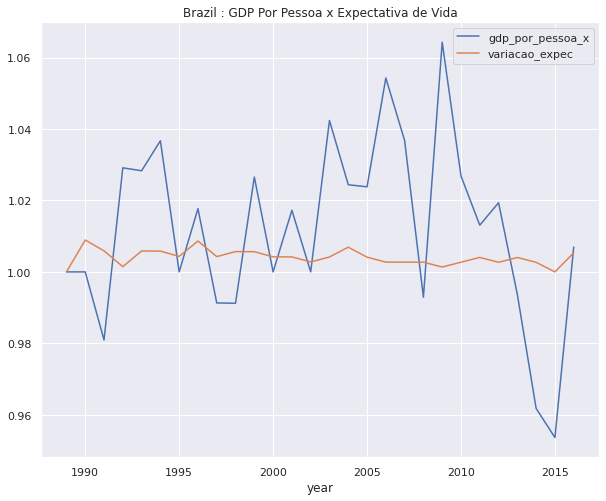

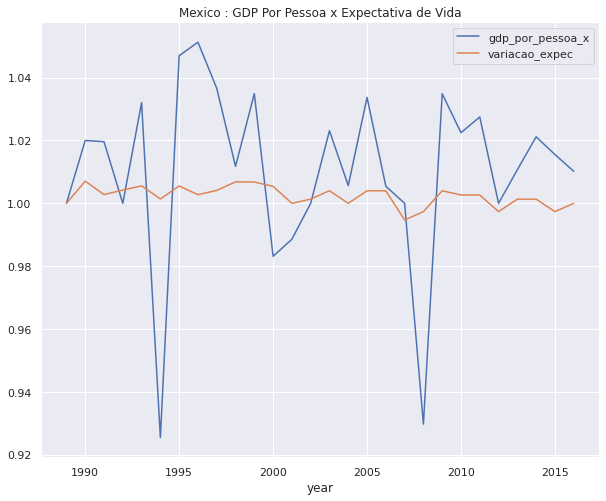

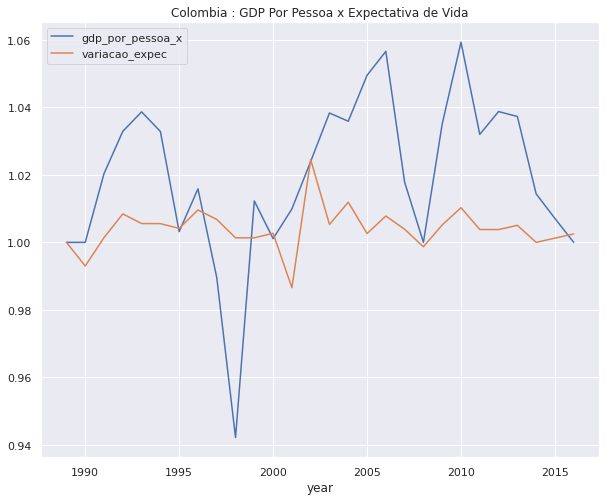

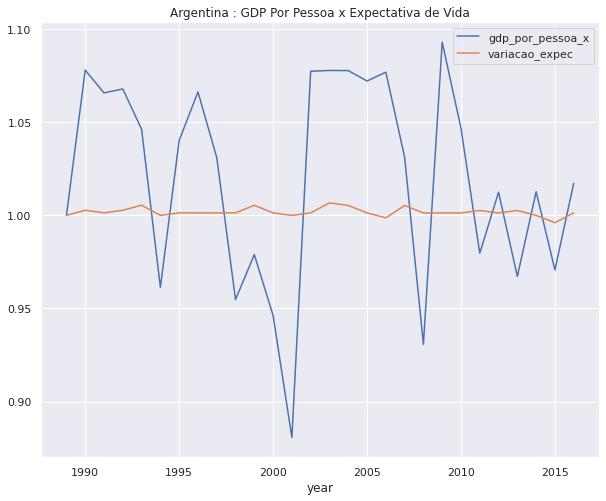

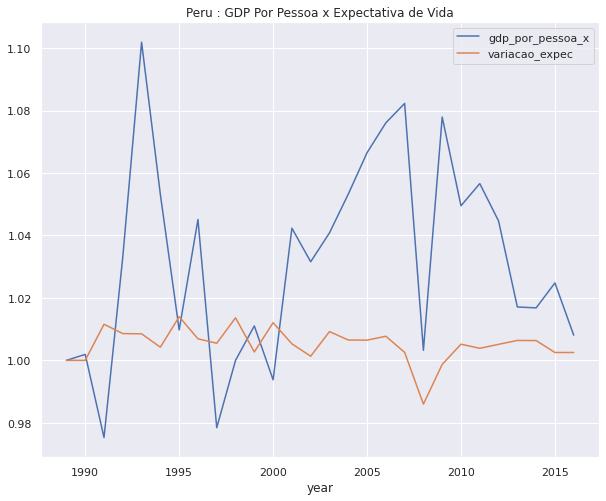

In [56]:
listas =  [df_gapminder_br_q5, df_gapminder_mx_q5,df_gapminder_co_q5, df_gapminder_ar_q5, df_gapminder_pe_q5 ]
for i in listas:
  pais = str(i.loc[1,'country'])
  iplot = i.plot(x="year", y=["gdp_por_pessoa_x", "variacao_expec"])
  plt.title(f"%s : GDP Por Pessoa x Expectativa de Vida"%(pais))
  plt.show()


Analisando os gráficos conseguimos encontrar poucas relações entre a variação do GDP e os números de expectativa de vida. Para alguns paises como México e Colombia existe uma certa relação entre os indicadores onde alguns anos que tiveram queda do GDP por pessoa o números de expectativa de vida apresenta queda.

## Análise (pergunta) 6.

**Observando os paises do Top 5 America Latina, qual pais tem os melhores números de HDI?**


In [57]:
#@markdown ---
#@title Q6. Aponte os principais recursos empregados nesta pergunta aqui:

Q6a = "Proporcoes de valores" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q6b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q6c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q6d = "Quantidades e Proporcoes (bar, pizza)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q6e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q6f = "" #@param {type:"string"}


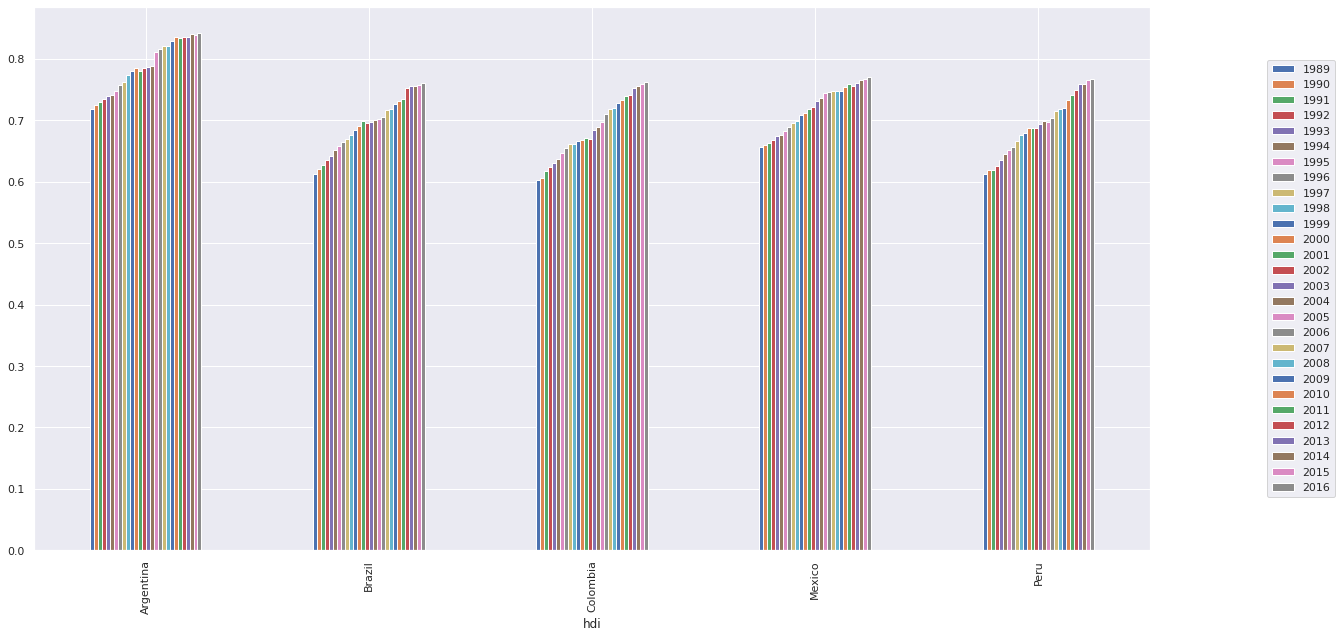

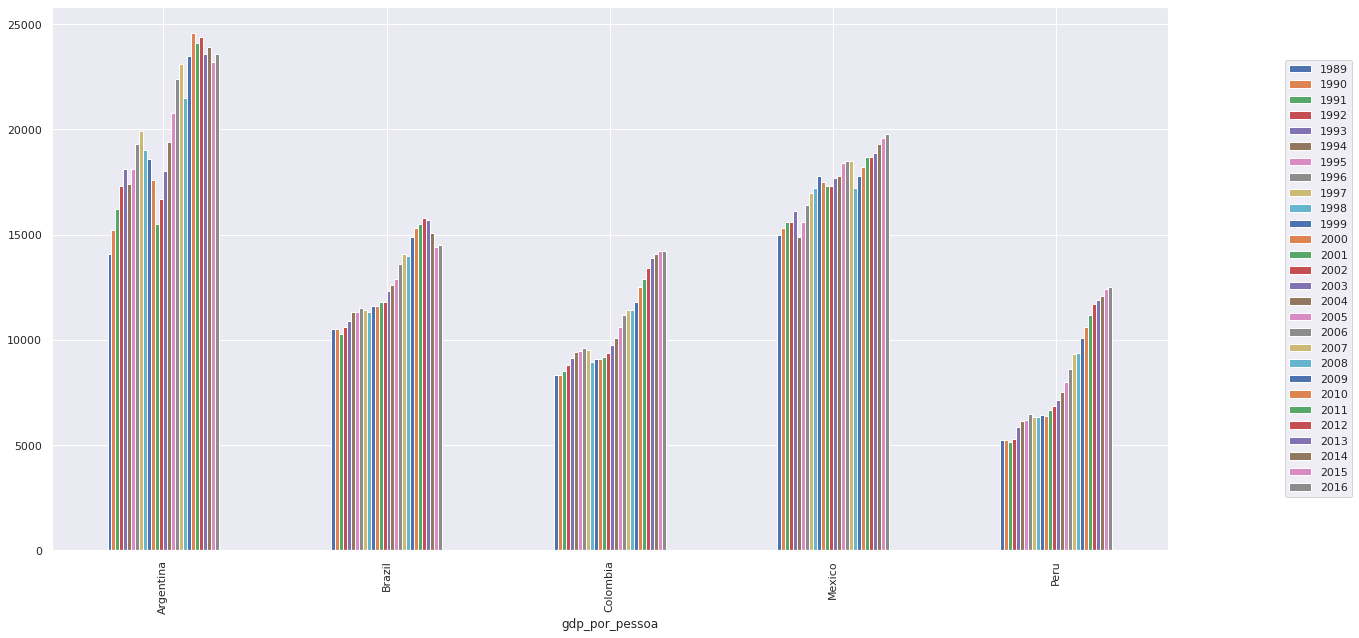

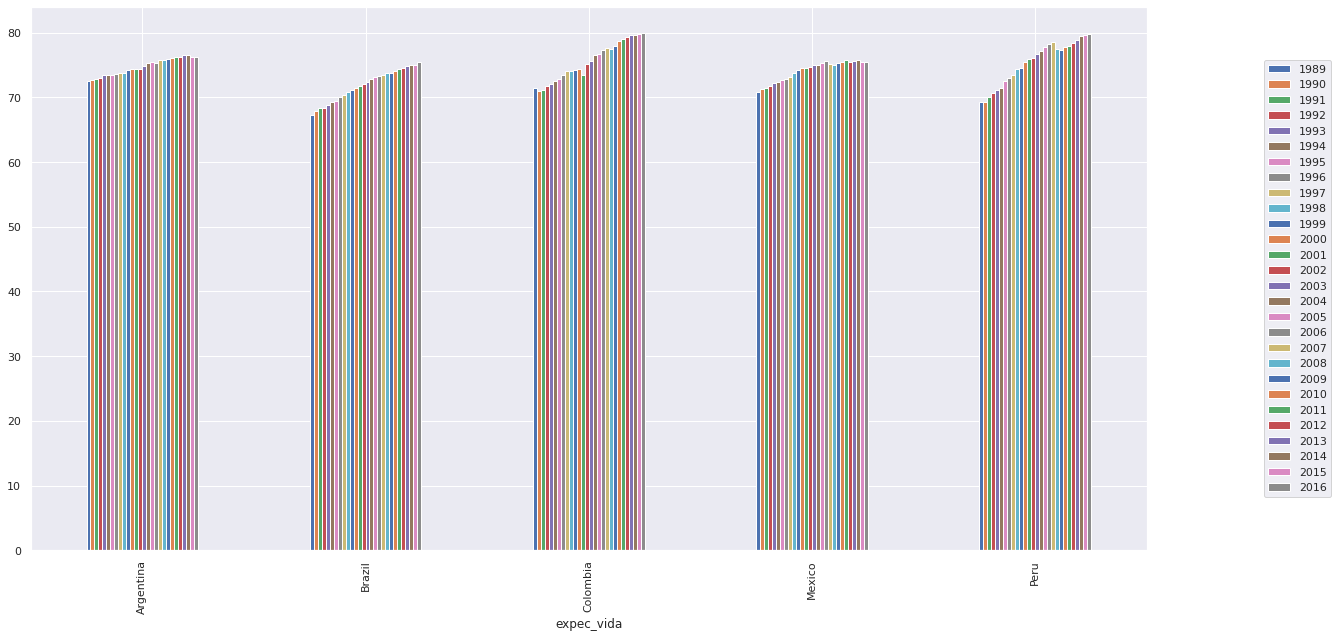

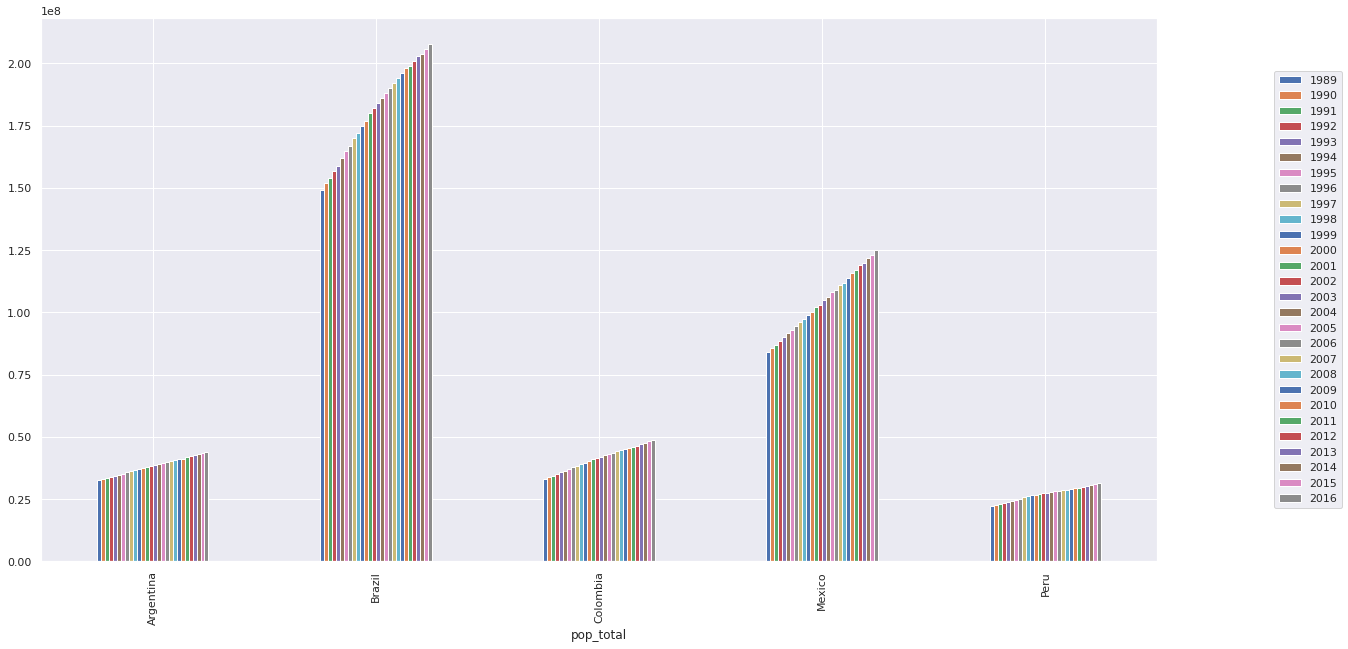

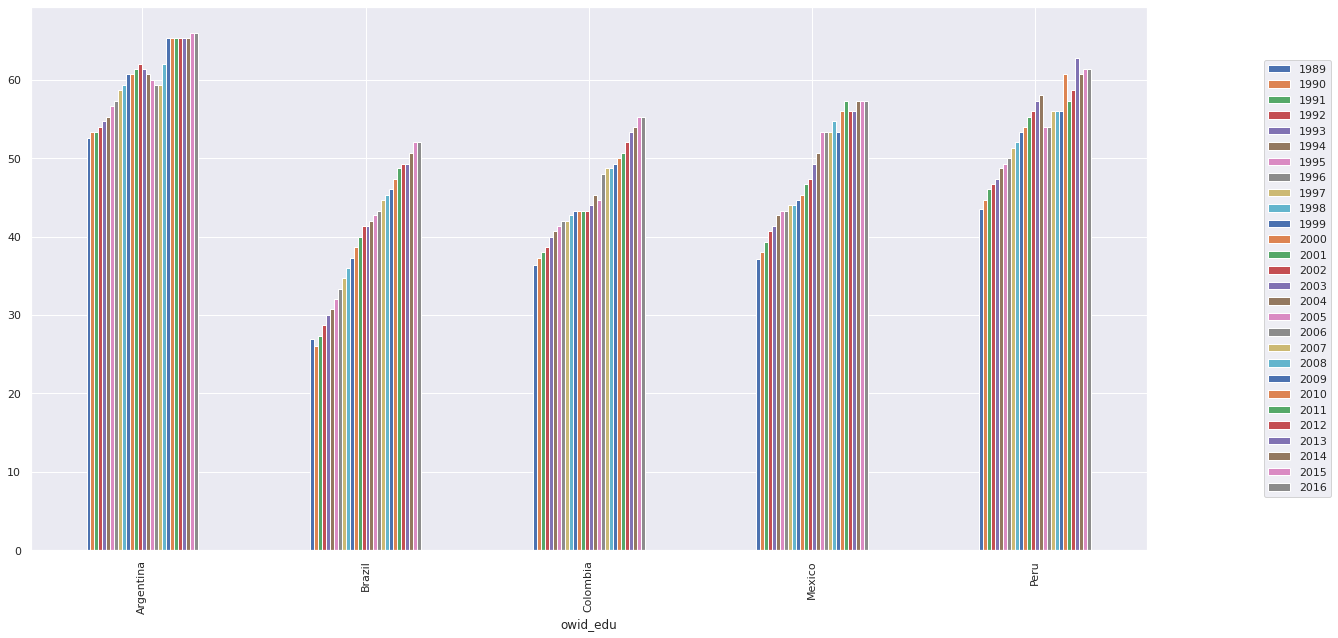

A Argentina possui os maiores valores de HDI desde o primeiro ano observado. Coincidentemente também possui os maiores valores nos outros indicadores com exceção do indicador de população que é dominado pelo Brasil


In [58]:
x=0
for i in lista_ajustada_data_al:
  teste = lista_ajustada_data_al[x].set_index(lista_ajustada_data_al[x].columns[0])
  a = teste.plot(kind='bar',figsize=(20,10))
  a.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
  plt.show()
  x += 1

print("A Argentina possui os maiores valores de HDI desde o primeiro ano observado. Coincidentemente também possui os maiores valores nos outros indicadores com exceção do indicador de população que é dominado pelo Brasil")


# Conclusão

Após analisar os dados dos Top 5 paises em população da América Latina para os anos de 1989 até 2016, como principais conclusões podemos citar:

O aumento de todos os indicadores de qualidade como IDH, PIB per capta e Expectativa de Vida. 
Um ponto observado para os países da América Latina é a variação de crescimento do PIB per capta da argentina é observado que em alguns momentos a variação é negativa, tendo em vista o número de crises existentes nos países da América Latina. 
Em relação ao Brasil, conseguimos notar o quão importante o pais é em relação aos números de população e também nos indicadores de educação, sendo o pais que apresentou o maior crescimento nesse indicador.
Por fim é ideal analisar os números acompanhado de informações históricas que com toda certeza afetam os indicadores observados, principalmente para os paises da América Latina que durante muitos anos já foram afetados por diversas crises.


---

In [59]:
#@markdown ---
#@title Notas
Completo = 0 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas todas as 6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados. 
Relevancia = 0 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema. 
Tecnicas = 0 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatíticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 0 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva 
Conclusao = 0 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}

#@markdown ### Sumário 
#@markdown ---

resumo = {}
for q in range(1,7):
  resumo[q] = []
  for t in ['a','b','c','d','e','f']:
    exec( 'resumo[q].append(Q' + str(q) + t + ')')

for q, recurso in resumo.items():
  for i in range(len(recurso)):
    if recurso[i][0:5] == 'Entre':
      recurso[i] = 'None'

print('Resumo')
print(60*'-')
for q in resumo:
  print('*** Questão: ', q)
  for r in resumo[q]:
    print(r)



Resumo
------------------------------------------------------------
*** Questão:  1
Proporcoes dos dados
Combinacao de dados (merge, join, concat)
Selecao de dados multicondicional
Quantidades e Proporcoes (bar, pizza)
Ornamentos (cores, markers etc.)

*** Questão:  2
None
None
None
None
None

*** Questão:  3
Medias e Desvio Padrao
Combinacao de dados (merge, join, concat)
Selecao de dados multicondicional
Quantidades e Proporcoes (bar, pizza)
Ornamentos (cores, markers etc.)

*** Questão:  4
None
None
None
None
None

*** Questão:  5
Proporcoes dos dados
Combinacao de dados (merge, join, concat)
None
None
None

*** Questão:  6
Proporcoes de valores
Combinacao de dados (merge, join, concat)
None
Quantidades e Proporcoes (bar, pizza)
Ornamentos (cores, markers etc.)



In [60]:
#@markdown ### Nota Final
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao 
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus  

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.2f}')



Nota final do trabalho 0.00
